In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from google.colab import files
import io
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
import pandas as pd
uploaded = files.upload()
file_name = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

Saving cleaned_promoter_data.csv to cleaned_promoter_data (1).csv


In [5]:
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(df['sequence'])

In [7]:
# Convert sequences to integer encoding
sequences = tokenizer.texts_to_sequences(df['sequence'])
max_length = df['seq_length'].max()
X = pad_sequences(sequences, maxlen=max_length, padding='post')
y = df['label'].values


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
# Build CNN model
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 64

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    Conv1D(filters=64, kernel_size=8, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=4, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [10]:
# Train model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1,
                    verbose=1)

Epoch 1/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 115s 332ms/step - accuracy: 0.9807 - loss: 0.0500 - val_accuracy: 1.0000 - val_loss: 3.4054e-31
Epoch 2/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 139s 324ms/step - accuracy: 1.0000 - loss: 2.1474e-11 - val_accuracy: 1.0000 - val_loss: 3.4052e-31
Epoch 3/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 111s 329ms/step - accuracy: 1.0000 - loss: 1.4700e-10 - val_accuracy: 1.0000 - val_loss: 3.4033e-31
Epoch 4/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 110s 325ms/step - accuracy: 1.0000 - loss: 1.8654e-11 - val_accuracy: 1.0000 - val_loss: 3.4030e-31
Epoch 5/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 112s 331ms/step - accuracy: 1.0000 - loss: 1.8975e-09 - val_accuracy: 1.0000 - val_loss: 3.2708e-31
Epoch 6/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 142s 331ms/step - accuracy: 1.0000 - loss: 5.7542e-13 - val_accuracy: 1.0000 - val_loss: 3.2708e-31
Epoch 7/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 140s 326ms/step - accuracy: 1.0000 - loss: 4.0714e-12 - val_accuracy: 1.0000 - val_loss: 3.2707e-31
Epoch 8/10
338/338 ━━━━━

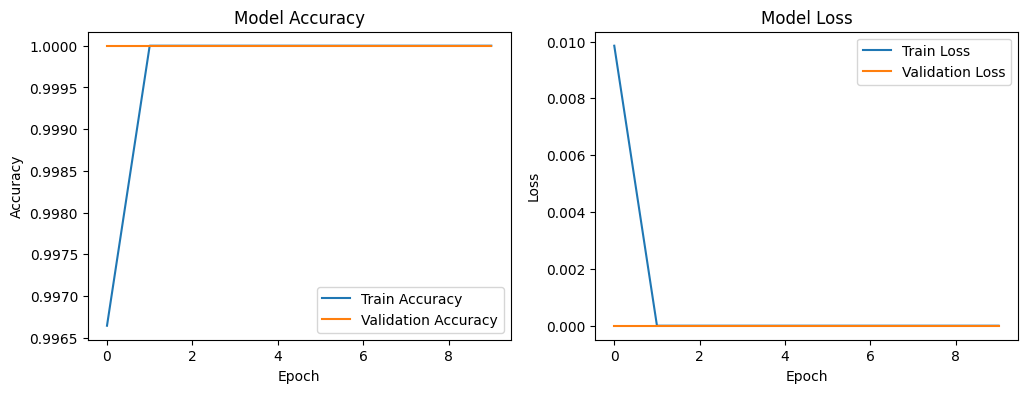

In [12]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [13]:
# Evaluate on test set
y_pred = (model.predict(X_test) > 0.5).astype(int)
test_acc = accuracy_score(y_test, y_pred)

print(f"\nTest Accuracy: {test_acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step

Test Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6000
           1       1.00      1.00      1.00      6000

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000



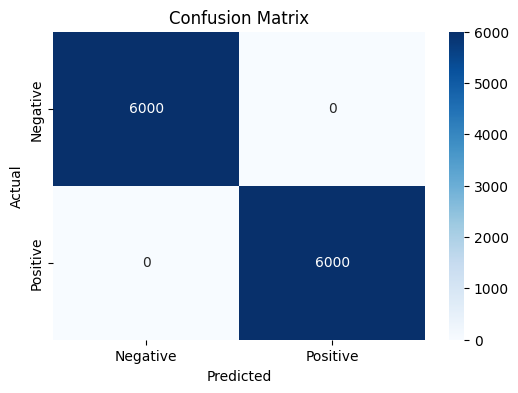

In [14]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [16]:
# Step : Save model
model.save('dna_promoter_classifier.h5')
print("Model saved as 'dna_promoter_classifier.h5'")

# Download the model
files.download('dna_promoter_classifier.h5')

Model saved as 'dna_promoter_classifier.h5'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>